<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
#| include: false

In [ ]:
#| include: false
from nbdev.showdoc import *

## 0. BaseIO

There are common methods needed for `Downloaders` and `Submittors`. [`BaseIO`](https://crowdcent.github.io/numerblox/download.html#baseio) implements this functionality and allows us to make abstract base classes. Namely, [`BaseDownloader`](https://crowdcent.github.io/numerblox/download.html#basedownloader) and [`BaseSubmitter`](https://crowdcent.github.io/numerblox/submission.html#basesubmitter) (implemented in `submission` section).

In [1]:
#| echo: false
#| output: asis
show_doc(BaseIO)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/download.py#L30){target="_blank" style="float:right; font-size:smaller"}

### BaseIO

>      BaseIO (directory_path:str)

Basic functionality for IO (downloading and uploading).

:param directory_path: Base folder for IO. Will be created if it does not exist.

## 1. BaseDownloader

[`BaseDownloader`](https://crowdcent.github.io/numerblox/download.html#basedownloader) is an object which implements logic common to all downloaders.

To implement a new Downloader, you should inherit from [`BaseDownloader`](https://crowdcent.github.io/numerblox/download.html#basedownloader) and be sure to implement at least methods for `.download_training_data` and `.download_inference_data`.

In [2]:
#| echo: false
#| output: asis
show_doc(BaseDownloader)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/download.py#L134){target="_blank" style="float:right; font-size:smaller"}

### BaseDownloader

>      BaseDownloader (directory_path:str)

Abstract base class for downloaders.

:param directory_path: Base folder to download files to.

## 2. Numerai Classic

In [3]:
#| echo: false
#| output: asis
show_doc(NumeraiClassicDownloader)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/download.py#L173){target="_blank" style="float:right; font-size:smaller"}

### NumeraiClassicDownloader

>      NumeraiClassicDownloader (directory_path:str, *args, **kwargs)

WARNING: Versions 1 and 2 (legacy data) are deprecated. Only supporting version 3+.

Downloading from NumerAPI for Numerai Classic data. 

:param directory_path: Base folder to download files to. 

All *args, **kwargs will be passed to NumerAPI initialization.

In [ ]:
#| eval: false
test_dir_classic = "test_numclassic_general"
numer_classic_downloader = NumeraiClassicDownloader(test_dir_classic)

# Test building class
assert isinstance(numer_classic_downloader.dir, PosixPath)
assert numer_classic_downloader.dir.is_dir()

# Test is_empty
(numer_classic_downloader.dir / "test.txt").write_text("test")
rich_print(f"Directory contents:\n{numer_classic_downloader.get_all_files}")
assert not numer_classic_downloader.is_empty

# Downloading example data
numer_classic_downloader.download_example_data("test/", version="4.2")

# Features
feature_stats_test = numer_classic_downloader.get_classic_features()
assert isinstance(feature_stats_test, dict)
assert len(feature_stats_test["feature_sets"]["medium"]) == 583

# Remove contents
numer_classic_downloader.remove_base_directory()
assert not os.path.exists(test_dir_classic)

No existing directory found at 'test_numclassic_general'. Creating directory...

Directory contents:
[Path('test_numclassic_general/test.txt')]

📁 Downloading 'v4.2/live_example_preds.parquet' 📁

2023-09-04 12:11:02,108 INFO numerapi.utils: starting download
test_numclassic_general/test/live_example_preds.parquet: 132kB [00:00, 701kB/s]                            


📁 Downloading 'v4.2/validation_example_preds.parquet' 📁

2023-09-04 12:11:02,982 INFO numerapi.utils: starting download
test_numclassic_general/test/validation_example_preds.parquet: 60.6MB [00:03, 19.1MB/s]                            


📁 Downloading 'v4.2/features.json' 📁

2023-09-04 12:11:06,717 INFO numerapi.utils: starting download
test_numclassic_general/features.json: 1.03MB [00:00, 3.32MB/s]                           


⚠ Deleting directory for 'NumeraiClassicDownloader' ⚠
Path: '/home/clepelaars/numerblox/nbs/test_numclassic_general'

### 2.1. Example usage

This section will explain how to quickly get started with [`NumeraiClassicDownloader`](https://crowdcent.github.io/numerblox/download.html#numeraiclassicdownloader).

The more advanced use case of working with GCS (Google Cloud Storage) is discussed in `edu_nbs/google_cloud_storage.ipynb`.

#### 2.1.1. Training data

Training + validation data for Numerai Classic can be downloaded with effectively 2 lines of code.
Feature stats and overview can be downloaded with `.get_classic_features()`.

In [ ]:
# Initialization
train_base_directory = "test_numclassic_train"
numer_classic_downloader = NumeraiClassicDownloader(train_base_directory)

# Uncomment line below to download training and validation data
# numer_classic_downloader.download_training_data("train_val", int8=True)

# 4.2 training data download should fail with int8=False
try:
    numer_classic_downloader.download_training_data("train_val", version="4.2", int8=False)
except NotImplementedError:
    pass
else:
    assert False, f"Downloading 4.2 data with int8=False should raise an error."

# Get feature overview (dict) for 4.2 data
numer_classic_downloader.get_classic_features()

# Remove contents (To clean up environment)
numer_classic_downloader.remove_base_directory()

No existing directory found at 'test_numclassic_train'. Creating directory...

📁 Downloading 'v4.2/features.json' 📁

2023-09-04 12:11:07,784 INFO numerapi.utils: starting download
test_numclassic_train/features.json: 1.03MB [00:00, 3.17MB/s]                           


⚠ Deleting directory for 'NumeraiClassicDownloader' ⚠
Path: '/home/clepelaars/numerblox/nbs/test_numclassic_train'

__For the training example the directory structure will be:__

In [ ]:
#| echo: false
console = Console(record=True, width=100)

tree = Tree(
    f":file_folder: {train_base_directory} (base_directory)",
    guide_style="bold bright_black",
)
folder_tree = tree.add(":page_facing_up: features.json")
train_val_tree = tree.add(":file_folder: train_val")
train_val_tree.add(":page_facing_up: numerai_training_data.parquet")
train_val_tree.add(":page_facing_up: numerai_validation_data.parquet")

console.print(tree)

📁 test_numclassic_train (base_directory)
┣━━ 📄 features.json
┗━━ 📁 train_val
    ┣━━ 📄 numerai_training_data.parquet
    ┗━━ 📄 numerai_validation_data.parquet

#### 2.1.2. Inference data

Inference data for the most recent round of Numerai Classic can be downloaded with effectively 2 lines of code.
It can also easily be deleted after you are done with inference by calling `.remove_base_directory`.

In [ ]:
# Initialization
inference_base_dir = "test_numclassic_inference"
numer_classic_downloader = NumeraiClassicDownloader(directory_path=inference_base_dir)

# Download tournament (inference) data
numer_classic_downloader.download_inference_data("inference", version="4.2", int8=True)

# Download meta model predictions
numer_classic_downloader.download_meta_model_preds("inference")

# Remove folder when done with inference
numer_classic_downloader.remove_base_directory()

No existing directory found at 'test_numclassic_inference'. Creating directory...

📁 Downloading 'v4.2/live_int8.parquet' 📁

2023-09-04 12:11:09,182 INFO numerapi.utils: starting download
test_numclassic_inference/inference/live_int8.parquet: 5.96MB [00:00, 12.3MB/s]                            


📁 Downloading 'v4.2/meta_model.parquet' 📁

2023-09-04 12:11:10,486 INFO numerapi.utils: starting download
test_numclassic_inference/inference/meta_model.parquet: 22.6MB [00:01, 18.2MB/s]                            


⚠ Deleting directory for 'NumeraiClassicDownloader' ⚠
Path: '/home/clepelaars/numerblox/nbs/test_numclassic_inference'

__For the inference example the directory structure will be:__

In [ ]:
#| echo: false
console = Console(record=True, width=100)

tree = Tree(
    f":file_folder: {inference_base_dir} (base_directory)",
    guide_style="bold bright_black",
)
inference_tree = tree.add(":file_folder: inference")
inference_tree.add(":page_facing_up: meta_model.parquet")
inference_tree.add(":page_facing_up: numerai_tournament_data.parquet")

console.print(tree)

📁 test_numclassic_inference (base_directory)
┗━━ 📁 inference
    ┣━━ 📄 meta_model.parquet
    ┗━━ 📄 numerai_tournament_data.parquet

## 3. KaggleDownloader (Numerai Signals)

The Numerai community maintains some excellent datasets on Kaggle for Numerai Signals.

For example, [Katsu1110](https://www.kaggle.com/code1110) maintains a [dataset with yfinance price data](https://www.kaggle.com/code1110/yfinance-stock-price-data-for-numerai-signals) on Kaggle that is updated daily. [`KaggleDownloader`](https://crowdcent.github.io/numerblox/download.html#kaggledownloader) allows you to easily pull data through the Kaggle API. We will be using this dataset in an example below.

In this case, `download_inference_data` and `download_training_data` have the same functionality as we can't make the distinction beforehand for an arbitrary dataset on Kaggle.

In [4]:
#| echo: false
#| output: asis
show_doc(KaggleDownloader)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/download.py#L443){target="_blank" style="float:right; font-size:smaller"}

### KaggleDownloader

>      KaggleDownloader (directory_path:str)

Download awesome financial data from Kaggle.

For authentication, make sure you have a directory called .kaggle in your home directory
with therein a kaggle.json file. kaggle.json should have the following structure: 

`{"username": USERNAME, "key": KAGGLE_API_KEY}` 

More info on authentication: github.com/Kaggle/kaggle-api#api-credentials 

More info on the Kaggle Python API: kaggle.com/donkeys/kaggle-python-api 

:param directory_path: Base folder to download files to.

The link to Katsu1110's yfinance price dataset is [https://www.kaggle.com/code1110/yfinance-stock-price-data-for-numerai-signals](https://www.kaggle.com/code1110/yfinance-stock-price-data-for-numerai-signals). In `.download_training_data` we define the slug after kaggle.com (`code1110/yfinance-stock-price-data-for-numerai-signals`) as an argument. The full Kaggle dataset is downloaded and unzipped.

In [ ]:
#| eval: false
home_directory = "test_kaggle_downloader"
kd = KaggleDownloader(home_directory)
kd.download_training_data("code1110/yfinance-stock-price-data-for-numerai-signals")

No existing directory found at 'test_kaggle_downloader'. Creating directory...

This Kaggle dataset contains one file called `"full_data.parquet"`.

In [ ]:
#| eval: false
list(kd.dir.iterdir())

[Path('test_kaggle_downloader/full_data.parquet')]

In [ ]:
#| eval: false
df = pd.read_parquet(f"{home_directory}/full_data.parquet")
df.head(2)

,ticker,date,close,raw_close,high,low,open,volume
0,000060 KS,20020103,534.924377,1248.795166,1248.795166,1248.795166,1248.795166,0.0
1,000060 KS,20020104,566.944519,1323.546997,1363.121460,1213.617798,1275.178223,3937763.0


Folder can be cleaned up when done with inference.

In [ ]:
#| eval: false
kd.remove_base_directory()

⚠ Deleting directory for 'KaggleDownloader' ⚠
Path: '/home/clepelaars/numerblox/nbs/test_kaggle_downloader'

## 4. EODDownloader

[EOD Historical data](https://eodhistoricaldata.com/) is an affordable Financial data APIs that offers a large range of global stock tickers. Very convenient for Numerai Signals modeling. We will use a Python API build on top of EOD Historical data to download stock ticker data for training and inference.

In [5]:
#| echo: false
#| output: asis
show_doc(EODDownloader)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/download.py#L484){target="_blank" style="float:right; font-size:smaller"}

### EODDownloader

>      EODDownloader (directory_path:str, key:str, tickers:list,
>                     frequency:str='d')

Download data from EOD historical data. 

More info: https://eodhistoricaldata.com/

:param directory_path: Base folder to download files to. 

:param key: Valid EOD client key. 

:param tickers: List of valid EOD tickers (Bloomberg ticker format). 

:param frequency: Choose from [d, w, m]. 

Daily data by default.

In [ ]:
os.listdir("test_assets")

['test_credentials.json',
 'mini_numerai_version_2_data.parquet',
 'lgb_v2_example_model.lgb',
 'keys.json',
 'external_submissions',
 'joblib_v2_example_model.joblib',
 'eodhd-map.csv']

In [ ]:
#| eval: false
key = BaseDownloader._load_json("test_assets/keys.json")['eod_key'] # YOUR_EOD_KEY_HERE
eodd = EODDownloader(directory_path="eod_test", key=key, tickers=['AAPL.US', 'MSFT.US', 'COIN.US', 'NOT_A_TICKER'])

If no starting date is passed in `download_training_data` this downloader will take the earliest date available. That is why the starting date in the filename is the 1st Unix timestamp (January 1st 1970).

In [ ]:
#| eval: false
eodd.download_inference_data()
eodd.download_training_data()

EOD price data extraction:   0%|          | 0/4 [00:00<?, ?it/s]

⚠ WARNING: Date pull failed on ticker: 'NOT_A_TICKER'. ⚠ Exception: 404 Client Error: Not Found for url: 
https://eodhistoricaldata.com/api/eod/NOT_A_TICKER?period=d&to=2023-09-04&fmt=json&api_token=621661e8653533.2141337
4&from=2022-09-04

EOD price data extraction:   0%|          | 0/4 [00:00<?, ?it/s]

⚠ WARNING: Date pull failed on ticker: 'NOT_A_TICKER'. ⚠ Exception: 404 Client Error: Not Found for url: 
https://eodhistoricaldata.com/api/eod/NOT_A_TICKER?period=d&to=2023-09-04&fmt=json&api_token=621661e8653533.2141337
4&from=1970-01-01

In [ ]:
#| eval: false
today = dt.now().strftime("%Y%m%d")
df = pd.read_parquet(f"eod_test/eod_19700101_{today}.parquet")
df.head(2)

,open,high,low,close,adjusted_close,volume,ticker
date,,,,,,,
2021-04-09,381.0,381.0,381.0,381.0,250.0,0,COIN.US
2021-04-12,381.0,381.0,381.0,381.0,250.0,0,COIN.US


Live data with a custom starting date can be retrieved as a [`NumerFrame`](https://crowdcent.github.io/numerblox/numerframe.html#numerframe) directly with `get_live_data`. The starting date can be either in `datetime`, `pd.Timestamp` or string format.

In [ ]:
#| eval: false
live_dataf = eodd.get_live_data(start=pd.Timestamp(year=2021, month=1, day=1))
live_dataf.head(2)

EOD price data extraction:   0%|          | 0/4 [00:00<?, ?it/s]

⚠ WARNING: Date pull failed on ticker: 'NOT_A_TICKER'. ⚠ Exception: 404 Client Error: Not Found for url: 
https://eodhistoricaldata.com/api/eod/NOT_A_TICKER?period=d&to=2023-09-04&fmt=json&api_token=621661e8653533.2141337
4&from=2021-01-01+00%3A00%3A00

,open,high,low,close,adjusted_close,volume,ticker
date,,,,,,,
2021-01-04,133.52,133.61,126.76,129.41,127.3317,143301900,AAPL.US
2021-01-05,128.89,131.74,128.43,131.01,128.9060,97664900,AAPL.US


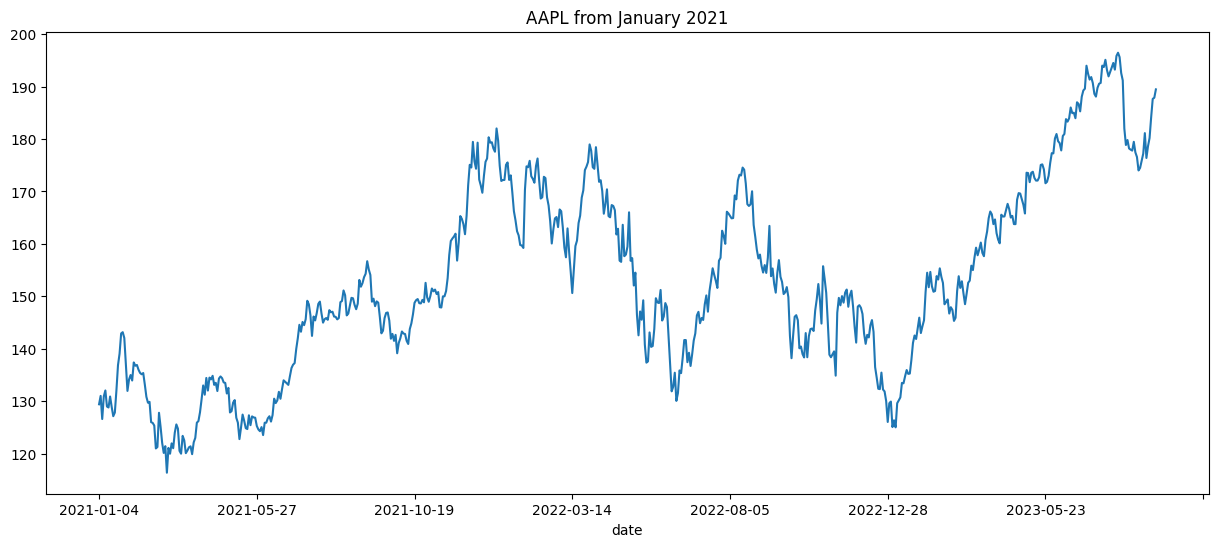

In [ ]:
#| eval: false
live_dataf[live_dataf['ticker'] == "AAPL.US"]['close'].plot(figsize=(15, 6), title="AAPL from January 2021");

In [ ]:
#| eval: false
eodd.remove_base_directory()

⚠ Deleting directory for 'EODDownloader' ⚠
Path: '/home/clepelaars/numerblox/nbs/eod_test'

## 5. Custom Downloader

We invite the Numerai Community to implement new downloaders for this project using interesting APIs.

These are especially important for creating innovative Numerai Signals models.

A new Downloader can be created by inheriting from [`BaseDownloader`](https://crowdcent.github.io/numerblox/download.html#basedownloader). You should implement methods for `.download_inference_data` and `.download_training_data` so every downloader has a common interface. Below you will find a template for a new downloader.

In [6]:
#| echo: false
#| output: asis
show_doc(AwesomeCustomDownloader)

---

[source](https://github.com/crowdcent/numerblox/blob/master/numerblox/download.py#L572){target="_blank" style="float:right; font-size:smaller"}

### AwesomeCustomDownloader

>      AwesomeCustomDownloader (directory_path:str)

TEMPLATE -
Download awesome financial data from who knows where.

:param directory_path: Base folder to download files to.

------------------------------------------------------------